# Facebook Ads and Sales Conversion

What can we learn from a KNN cluster analysis about an anonymous organization's (Company XYZ) ad campaign? What will this tell us about its sales conversions?

Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

Import dataset

In [2]:
data = pd.read_csv("KAG_conversion_data.csv")
data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


## Data Preprocessing

In [3]:
# Determine categories in 'xyz_campaign_id' variable:
data['xyz_campaign_id'].unique()

array([ 916,  936, 1178], dtype=int64)

#### Convert variables to approprate formats 

In [4]:
data['xyz_campaign_id'] = (data['xyz_campaign_id']).astype('category')

In [5]:
# Recode 'gender' variable as type numeric:
def gender (series):
    if series == 'M':
        return 0
    if series == 'F':
        return 1
data['genderR'] = data['gender'].apply(gender)
# check work
data.head(2)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,genderR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0


In [6]:
# determine categories in 'age' variable:
data['age'].unique()

array(['30-34', '35-39', '40-44', '45-49'], dtype=object)

In [7]:
# recode 'age' into numeric 'average age'
def mean_age (series):
    if series == '30-34':
        return 32
    if series == '35-39':
        return 37
    if series == '40-44':
        return 42
    if series == '45-49':
        return 47
data['ageR'] = data['age'].apply(mean_age)
data.head(1)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,genderR,ageR
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0,32


In [8]:
data['interest'].unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106], dtype=int64)

#### Remove NA's and subset the data to only the variables needed

In [9]:
data_cleaned = data[['xyz_campaign_id','Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','genderR','ageR','interest']].dropna()
data_cleaned.head()

,xyz_campaign_id,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,genderR,ageR,interest
0,916,7350,1,1.43,2,1,0,32,15
1,916,17861,2,1.82,2,0,0,32,16
2,916,693,0,0.00,1,0,0,32,20
3,916,4259,1,1.25,1,0,0,32,28
4,916,4133,1,1.29,1,1,0,32,28


#### Scale the data

In [10]:
scaler = StandardScaler()
scaler.fit(data_cleaned.drop('xyz_campaign_id', axis = 1))
scaledVariables = scaler.transform(data_cleaned.drop('xyz_campaign_id', axis=1))
data_cleaned_scaled = pd.DataFrame(scaledVariables, columns=['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','genderR','ageR','interest'])
data_cleaned_scaled.head()

,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,genderR,ageR,interest
0,-0.573793,-0.569573,-0.574772,-0.190922,0.032236,-0.96475,-1.071137,-0.659472
1,-0.540171,-0.551988,-0.570282,-0.190922,-0.543486,-0.96475,-1.071137,-0.622353
2,-0.595087,-0.587157,-0.591233,-0.414055,-0.543486,-0.96475,-1.071137,-0.473877
3,-0.583680,-0.569573,-0.576844,-0.414055,-0.543486,-0.96475,-1.071137,-0.176924
4,-0.584083,-0.569573,-0.576383,-0.414055,0.032236,-0.96475,-1.071137,-0.176924


#### Create the x and y datasets

In [11]:
x = data_cleaned_scaled[['Impressions','Clicks','Spent','Total_Conversion','Approved_Conversion','genderR','ageR','interest']]
y = data_cleaned['xyz_campaign_id']

#### Train/Test Split

In [12]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.3 )

## KNN Analysis

In [13]:
# Import KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

# Create K values (1-50) & Create Arrays to store train/test performance accuracy
k = np.arange(1,50)
train_accuracy = np.empty(len(k))
test_accuracy = np.empty(len(k))

for i,k in enumerate(k):
    # Instantiate NN Classifier with K Neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit KNN model
    knn.fit(x_train, y_train)
    
    # Evaluate train performance 
    train_accuracy[i] = knn.score(x_train, y_train)
    
    # Evaluate test performance
    test_accuracy[i] = knn.score(x_test, y_test) 

## Interpret the KNN predictions

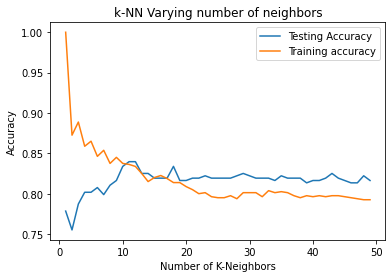

In [18]:
# Visualize Train/Test Performance
k = np.arange(1,50)
plt.title('k-NN Varying number of neighbors')
plt.plot(k, test_accuracy, label='Testing Accuracy')
plt.plot(k, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of K-Neighbors')
plt.ylabel('Accuracy')
plt.show()

In [15]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV

leaf_size = list(range(1,50))
n_neighbors = list(range(1,50))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, hyperparameters, cv=3)
#Fit the model
best_model = clf.fit(x,y)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 1
Best p: 1
Best n_neighbors: 31


In [16]:
knn = KNeighborsClassifier(n_neighbors=31,p=1,leaf_size=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print(confusion_matrix(y_test, pred))

[[  0  18   0]
 [  0 149   7]
 [  0  29 140]]


In [17]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         916       0.00      0.00      0.00        18
         936       0.76      0.96      0.85       156
        1178       0.95      0.83      0.89       169

    accuracy                           0.84       343
   macro avg       0.57      0.59      0.58       343
weighted avg       0.81      0.84      0.82       343

